In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/groceries-dataset/Groceries_dataset.csv


### ***Importing Dataset***

In [2]:
dataset = pd.read_csv("../input/groceries-dataset/Groceries_dataset.csv")
dataset

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
dataset['Member_number'].unique().size

3898

**3898 Customers**

In [4]:
dates = dataset['Date'].unique()
dates = list(dates)
dates.sort(key=lambda date: datetime.strptime(date, "%d-%m-%Y"))
dates

['01-01-2014',
 '02-01-2014',
 '03-01-2014',
 '04-01-2014',
 '05-01-2014',
 '06-01-2014',
 '07-01-2014',
 '08-01-2014',
 '09-01-2014',
 '10-01-2014',
 '11-01-2014',
 '12-01-2014',
 '13-01-2014',
 '14-01-2014',
 '15-01-2014',
 '16-01-2014',
 '17-01-2014',
 '18-01-2014',
 '19-01-2014',
 '20-01-2014',
 '21-01-2014',
 '22-01-2014',
 '23-01-2014',
 '24-01-2014',
 '25-01-2014',
 '26-01-2014',
 '27-01-2014',
 '28-01-2014',
 '29-01-2014',
 '30-01-2014',
 '31-01-2014',
 '01-02-2014',
 '02-02-2014',
 '03-02-2014',
 '04-02-2014',
 '05-02-2014',
 '06-02-2014',
 '07-02-2014',
 '08-02-2014',
 '09-02-2014',
 '10-02-2014',
 '11-02-2014',
 '12-02-2014',
 '13-02-2014',
 '14-02-2014',
 '15-02-2014',
 '16-02-2014',
 '17-02-2014',
 '18-02-2014',
 '19-02-2014',
 '20-02-2014',
 '21-02-2014',
 '22-02-2014',
 '23-02-2014',
 '24-02-2014',
 '25-02-2014',
 '26-02-2014',
 '27-02-2014',
 '28-02-2014',
 '01-03-2014',
 '02-03-2014',
 '03-03-2014',
 '04-03-2014',
 '05-03-2014',
 '06-03-2014',
 '07-03-2014',
 '08-03-20

* 1-1-2014 upto 30-12-2015
* **2 Years Data**

In [5]:
f = dataset.groupby(['itemDescription']).size()
f = pd.Series.to_frame(f,name = 'No. of items')
f.sort_values(by = "No. of items", inplace = True, ascending = False)
f

,No. of items
itemDescription,
whole milk,2502
other vegetables,1898
rolls/buns,1716
soda,1514
yogurt,1334
...,...
rubbing alcohol,5
bags,4
baby cosmetics,3


In [6]:
items = f.index
items = list(items)
count = f['No. of items']
count = list(count)

<AxesSubplot:>

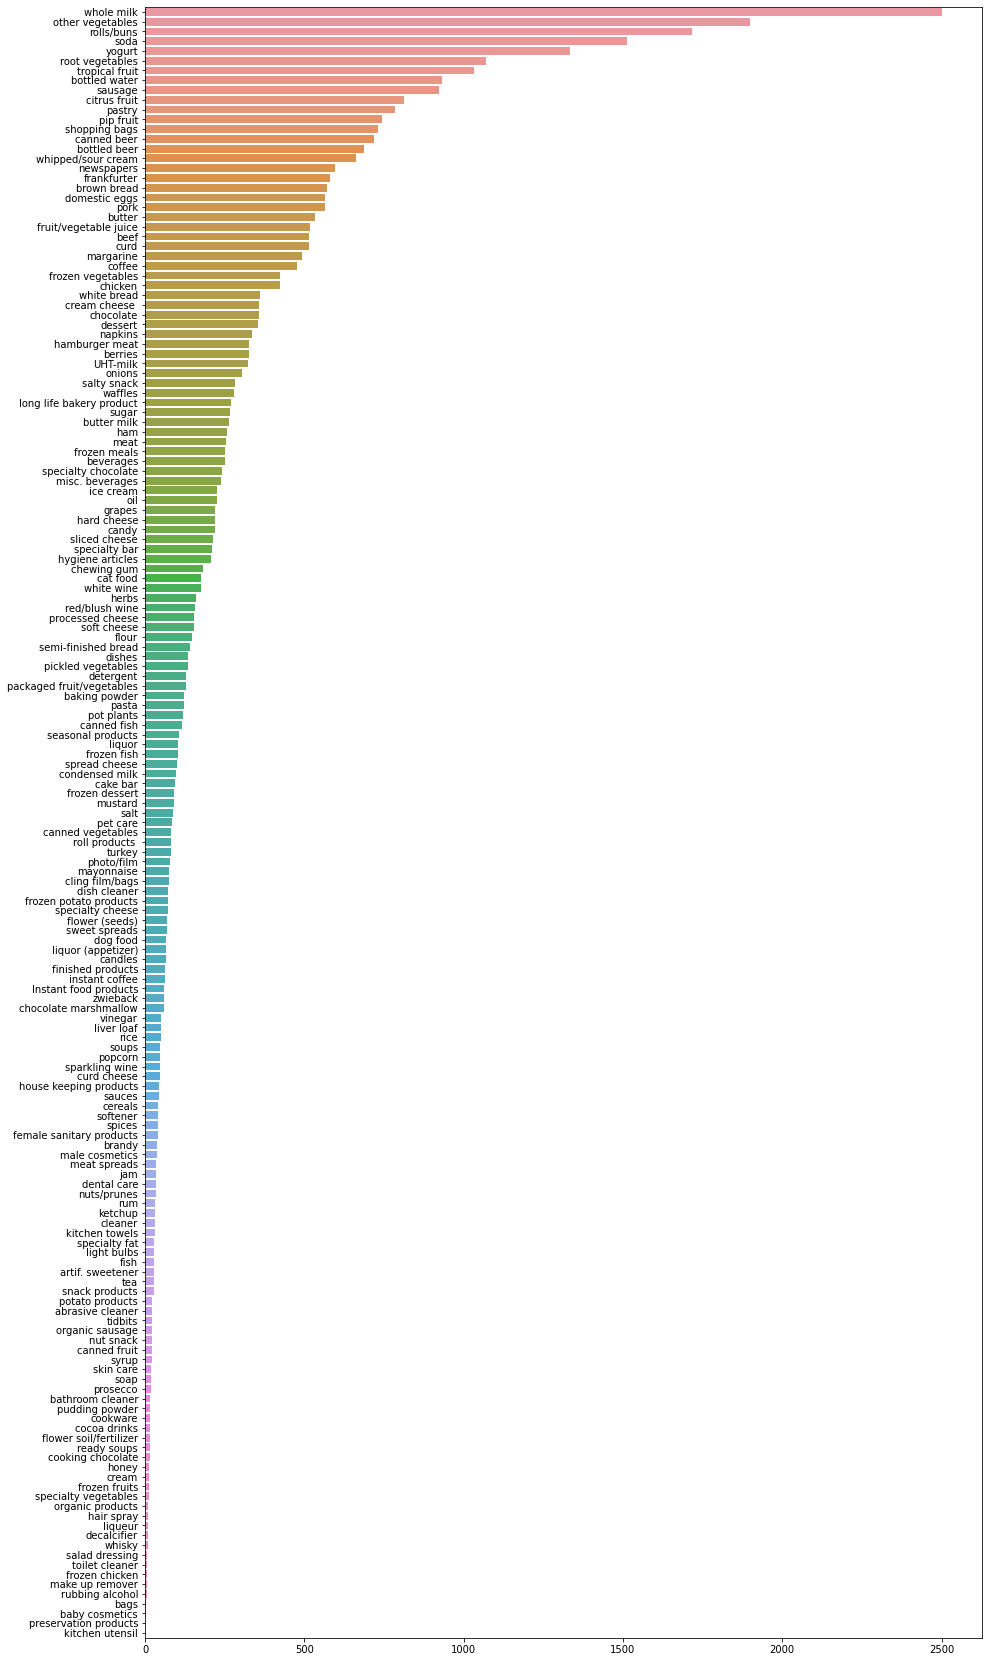

In [7]:
plt.figure(figsize = (15,30))
sns.barplot(x = count,y = items)

In [8]:
dataset.sort_values(by='Member_number',inplace = True)
dataset

,Member_number,Date,itemDescription
1629,1000,27-05-2015,soda
13331,1000,24-06-2014,whole milk
8395,1000,15-03-2015,whole milk
4843,1000,15-03-2015,sausage
17778,1000,27-05-2015,pickled vegetables
...,...,...,...
34885,5000,10-02-2015,semi-finished bread
25489,5000,16-11-2014,other vegetables
9340,5000,16-11-2014,bottled beer
27877,5000,09-03-2014,onions


In [9]:
#Dropping the dates column
X = dataset.iloc[:,[0,2]].values
X

array([[1000, 'soda'],
       [1000, 'whole milk'],
       [1000, 'whole milk'],
       ...,
       [5000, 'bottled beer'],
       [5000, 'onions'],
       [5000, 'soda']], dtype=object)

#### ***Maintaining a list of items of different customers***

In [10]:
n = 1000
items = []
transactions = []
for i in range(38765):
    if(X[i,0] == n):
        items.append(X[i,1])
        n = X[i,0]
    else:
        transactions.append(items)
        items = []
        n = X[i,0]
transactions[0]

['soda',
 'whole milk',
 'whole milk',
 'sausage',
 'pickled vegetables',
 'canned beer',
 'yogurt',
 'misc. beverages',
 'salty snack',
 'sausage',
 'semi-finished bread',
 'hygiene articles',
 'pastry']

### ***Apriori***

**Considering that an item occurs thrice a week, support comes out to be 0.004 for which no items satisfy. Hence reducing the support to 0.002 with a minimum confidence of 0.2 yiels a few results**

In [11]:
! pip install apyori
from apyori import apriori
rules = apriori(transactions = transactions , min_support = 0.002, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

  Preparing metadata (setup.py) ... - done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=0c05cec93db9ec7913bb95c5ae57936c7c11fe110d624164d770cca367fca857
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [12]:
result = list(rules)
result

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002052861175263023, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.32, lift=4.437864768683275)]),
 RelationRecord(items=frozenset({'rice', 'UHT-milk'}), support=0.0028226841159866563, ordered_statistics=[OrderedStatistic(items_base=frozenset({'rice'}), items_add=frozenset({'UHT-milk'}), confidence=0.2391304347826087, lift=3.3163391613801645)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002052861175263023, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4210526315789474, lift=3.8248067721751937)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002052861175263023, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4444444444444445, lift

In [13]:
def inspect(result):
    lhs = [tuple(i[2][0][0])[0] for i in result]
    rhs = [tuple(i[2][0][1])[0] for i in result]
    support = [i[1] for i in result]
    confidence = [i[2][0][2] for i in result]
    lift = [i[2][0][3] for i in result]
    return list(zip(lhs, rhs, support, confidence, lift))
df = pd.DataFrame(inspect(result), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])
df.sort_values(by = 'Lift', ascending = False,inplace = True)
df

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002053,0.320000,4.437865
3,canned fruit,coffee,0.002053,0.444444,4.287129
2,potato products,beef,0.002053,0.421053,3.824807
6,sparkling wine,waffles,0.002309,0.219512,3.491588
1,rice,UHT-milk,0.002823,0.239130,3.316339
5,rice,napkins,0.002823,0.239130,3.292902
4,nuts/prunes,coffee,0.002053,0.320000,3.086733


#### <center> **Please Upvote if you find it useful.** </center>